In [1]:
import random

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(0)
np.random.seed(0)
cv.setRNGSeed(0)

In [3]:
def read_image(path, is_grayscale=False):
    if is_grayscale:
        img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    else:
        img = cv.imread(path, cv.IMREAD_COLOR)
    assert img is not None, f"Failed to read image from {path}"
    return img

In [4]:
def show_image(img):
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        assert len(img.shape) == 3 and img.shape[2] == 3
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

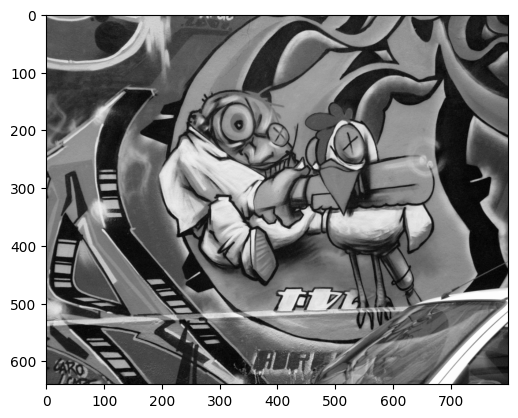

In [5]:
img = read_image('graff.png', is_grayscale=True)
show_image(img)

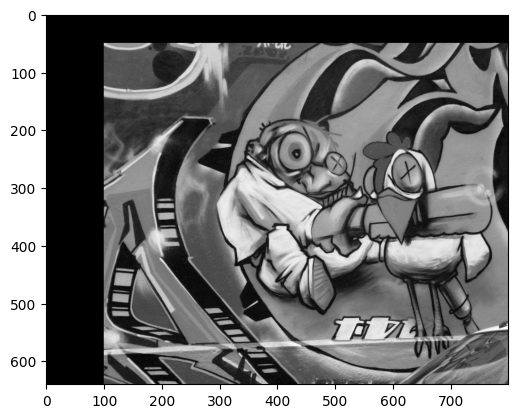

In [6]:
# x column, y row!

def translate(img, tx, ty):
    assert isinstance(tx, int) and isinstance(ty, int)
    translated_img = np.zeros_like(img)
    translated_img[ty:, tx:] = img[:-ty, :-tx]
    return translated_img


def translate_with_opencv(img, tx, ty):
    # tx and ty do not have to be integers.
    trans_mat = np.float32([[1, 0, tx], [0, 1, ty]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, trans_mat, dimensions)


tx = 100
ty = 50
translated_img = translate(img, tx, ty)
show_image(translated_img)

assert translated_img.shape == img.shape
assert (translated_img[ty:ty+10, tx:tx+10] == img[0:10, 0:10]).all()  # check if some of the pixels are the same (sanity check)
assert (translated_img == translate_with_opencv(img, tx, ty)).all()

In [7]:
img = img[ty:, tx:]
translated_img = translated_img[ty:, tx:]

assert img.shape == translated_img.shape
# Cozunurlukleri ayni ve translated_img'deki siyah bolgeyi ortadan kaldirdik.

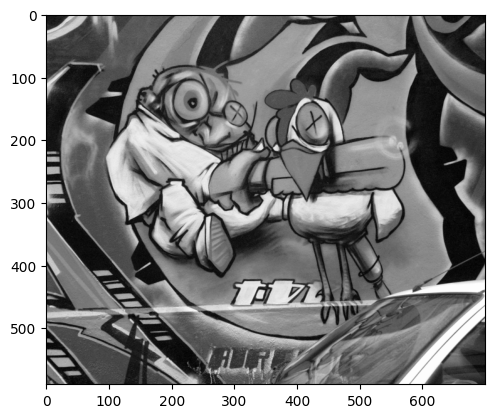

In [8]:
show_image(img)

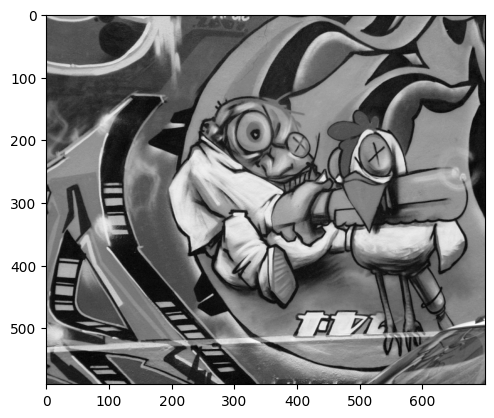

In [9]:
show_image(translated_img)

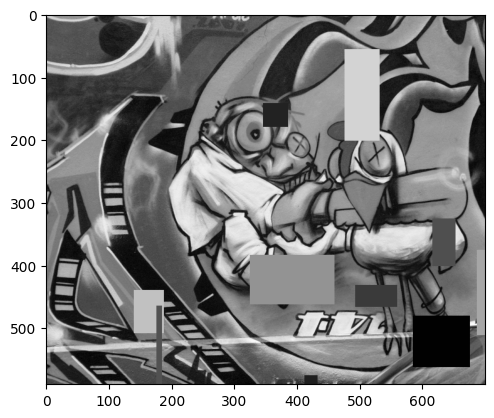

In [10]:
def add_occlusions(img, occlusion_count, divider=3):
    img = img.copy()
    h, w = img.shape[:2]
    channel_count = 1 if len(img.shape) == 2 else img.shape[2]
    for _ in range(occlusion_count):
        x1, y1 = np.random.randint(0, w // divider), np.random.randint(0, h // divider)
        x2, y2 = np.random.randint(0, w // divider), np.random.randint(0, h // divider)

        x_offset = np.random.randint(0, w - x2)
        y_offset = np.random.randint(0, h - y2)
        x1 += x_offset
        y1 += y_offset
        x2 += x_offset
        y2 += y_offset

        color = np.random.randint(0, 255, size=channel_count).tolist()
        cv.rectangle(img, (x1, y1), (x2, y2), color, -1)
    return img

occluded_translated_img = add_occlusions(translated_img, occlusion_count=10)
show_image(occluded_translated_img)

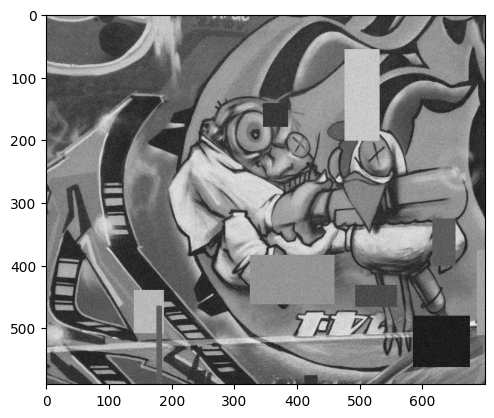

In [11]:
def add_noise(x, noise_level):
    return x + noise_level * np.random.randn(*x.shape)

noisy_occluded_translated_img = add_noise(occluded_translated_img, 10)
show_image(noisy_occluded_translated_img)

In [13]:
cv.imwrite('translation_dataset/graff-1.png', img)

cv.imwrite('translation_dataset/graff-2-identical.png', img)
cv.imwrite('translation_dataset/graff-2-translated.png', translated_img)
cv.imwrite('translation_dataset/graff-2-occluded-translated.png', occluded_translated_img)
cv.imwrite('translation_dataset/graff-2-noisy-occluded-translated.png', noisy_occluded_translated_img)

True